In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
import earth_model

In [3]:
r_earth = 6371 # km

vp_params = np.array([[11.2622,   0.0000, -6.3640,   0.0000],
                      [11.0487,  -4.0362,  4.8023, -13.5732],
                      [15.3891,  -5.3181,  5.5242,  -2.5514],
                      [24.9520, -40.4673, 51.4832, -26.6419],
                      [29.2766, -23.6027,  5.5242,  -2.5514],
                      [19.0957,  -9.8672,  0.0000,   0.0000],
                      [39.7027, -32.6166,  0.0000,   0.0000],
                      [20.3926, -12.2569,  0.0000,   0.0000],
                      [ 4.1875,   3.9382,  0.0000,   0.0000],
                      [ 4.1875,   3.9382,  0.0000,   0.0000],
                      [ 6.8000,   0.0000,  0.0000,   0.0000],
                      [ 5.8000,   0.0000,  0.0000,   0.0000]])


vs_params = np.array([[ 3.6678,   0.0000,  -4.4475,  0.0000],
                      [ 0.0000,   0.0000,   0.0000,  0.0000],
                      [ 6.9254,   1.4672,  -2.0834,  0.9783],
                      [11.1671, -13.7818,  17.4575, -9.2777],
                      [22.3459, -17.2473,  -2.0834,  0.9783],
                      [ 9.9839,  -4.9324,   0.0000,  0.0000],
                      [22.3512, -18.5856,   0.0000,  0.0000],
                      [ 8.9496,  -4.4597,   0.0000,  0.0000],
                      [ 2.1519,   2.3481,   0.0000,  0.0000],
                      [ 2.1519,   2.3481,   0.0000,  0.0000],
                      [ 3.9000,   0.0000,   0.0000,  0.0000],
                      [ 3.2000,   0.0000,   0.0000,  0.0000]])

q_kappa_params = np.array([1327.7, 57823.0, 57823.0, 57823.0, 57823.0,
                           57823.0, 57823.0, 57823.0, 57823.0, 57823.0,
                           57823.0, 57823.0])

q_mu_params = np.array([84.6, np.inf, 312.0, 312.0, 312.0, 143.0, 143.0,
                        143.0, 80.0, 600.0, 600.0, 600.0])
                          
breakpoints = np.array([0.0, 1221.5, 3480.0, 3630.0, 5600.0, 5701.0, 5771.0,
                        5971.0, 6151.0, 6291.0, 6346.6, 6356.0, 6371.0])

vp_params[:,1] = vp_params[:,1] / r_earth 
vp_params[:,2] = vp_params[:,2] / (r_earth**2)
vp_params[:,3] = vp_params[:,3] / (r_earth**3)

vs_params[:,1] = vs_params[:,1] / r_earth 
vs_params[:,2] = vs_params[:,2] / (r_earth**2)
vs_params[:,3] = vs_params[:,3] / (r_earth**3)
                       
prem = earth_model.Prem(breakpoints=breakpoints, r_earth=r_earth, vp_params=vp_params,
                        vs_params=vs_params, q_mu_params=q_mu_params,
                        q_kappa_params=q_kappa_params)

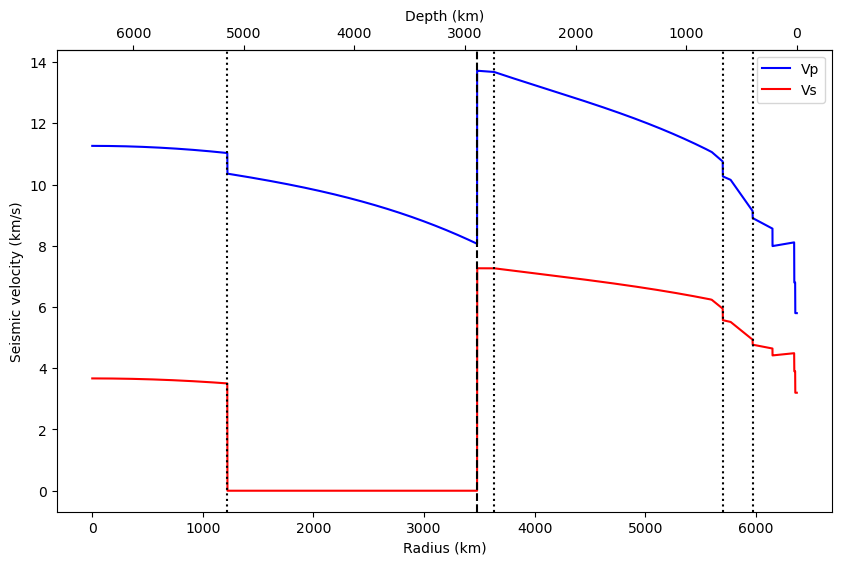

In [4]:
fig, ax = plt.subplots(figsize=(10,6))

rs = np.arange(0, 6371, 0.5)
ax.plot(rs, prem.vp(rs), 'b', label='Vp')
ax.plot(rs, prem.vs(rs), 'r', label='Vs')

ax.set_xlabel('Radius (km)')
ax.set_ylabel('Seismic velocity (km/s)')
ax.legend()

ax.axvline(1221.5, ls=':', c='k')
ax.axvline(3480, ls='--', c='k')
ax.axvline(3630, ls=':', c='k')
ax.axvline(5701, ls=':', c='k')
ax.axvline(5971, ls=':', c='k')

secax = ax.secondary_xaxis('top', functions=(lambda x: 6371 - x, lambda x: 6371 - x))
secax.set_xlabel('Depth (km)')

plt.show()

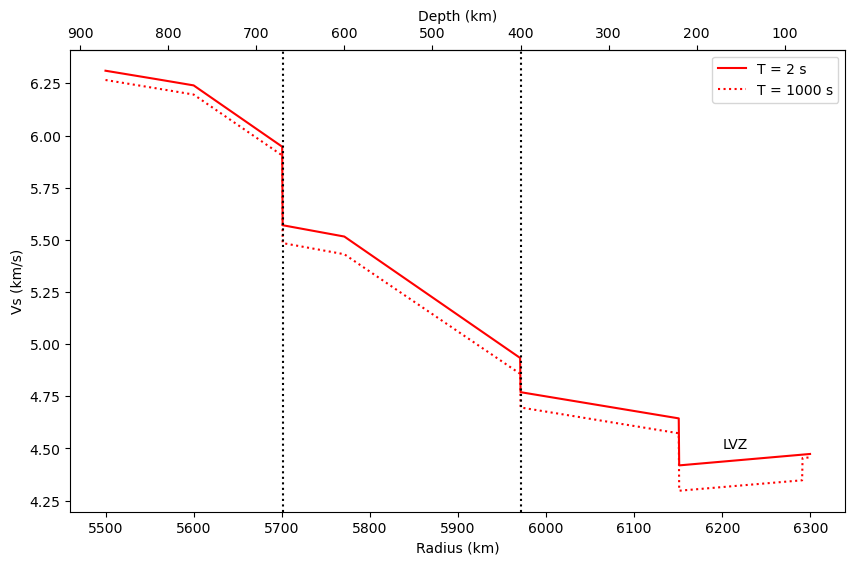

In [5]:
fig, ax = plt.subplots(figsize=(10,6))

rs = np.arange(5500, 6300, 0.5)
ax.plot(rs, prem.vs(rs), 'r', label='T = 2 s')
ax.plot(rs, prem.vs(rs, t=1000.0), 'r:', label='T = 1000 s')
ax.set_xlabel('Radius (km)')
ax.set_ylabel('Vs (km/s)')
ax.legend()

ax.axvline(5701, ls=':', c='k')
ax.axvline(5971, ls=':', c='k')
ax.annotate('LVZ', (6200, 4.5))


secax = ax.secondary_xaxis('top', functions=(lambda x: 6371 - x, lambda x: 6371 - x))
secax.set_xlabel('Depth (km)')

plt.show()

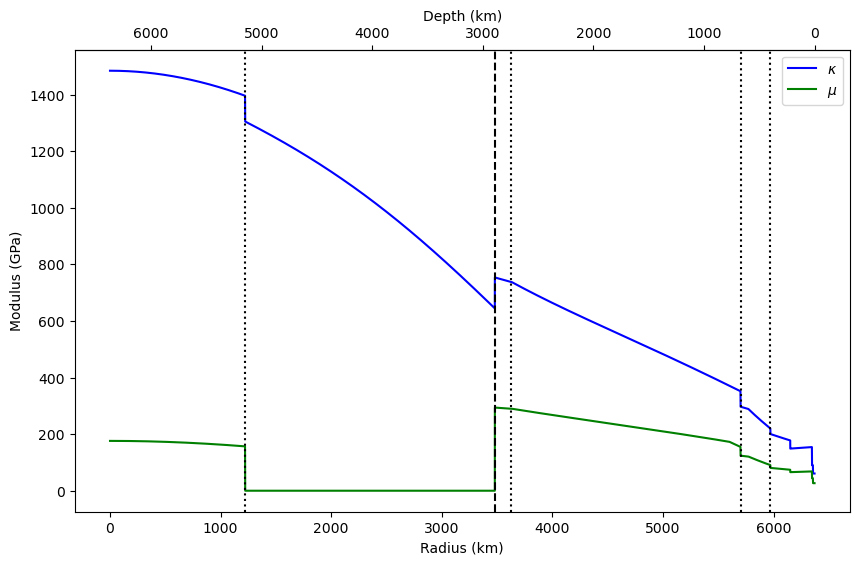

In [6]:
fig, ax = plt.subplots(figsize=(10,6))

rs = np.arange(0, 6371, 0.5)
ax.plot(rs, prem.bulk_modulus(rs), 'b', label='$\kappa$')
ax.plot(rs, prem.shear_modulus(rs), 'g', label='$\mu$')

ax.set_xlabel('Radius (km)')
ax.set_ylabel('Modulus (GPa)')
ax.legend()

ax.axvline(1221.5, ls=':', c='k')
ax.axvline(3480, ls='--', c='k')
ax.axvline(3630, ls=':', c='k')
ax.axvline(5701, ls=':', c='k')
ax.axvline(5971, ls=':', c='k')

secax = ax.secondary_xaxis('top', functions=(lambda x: 6371 - x, lambda x: 6371 - x))
secax.set_xlabel('Depth (km)')

plt.show()

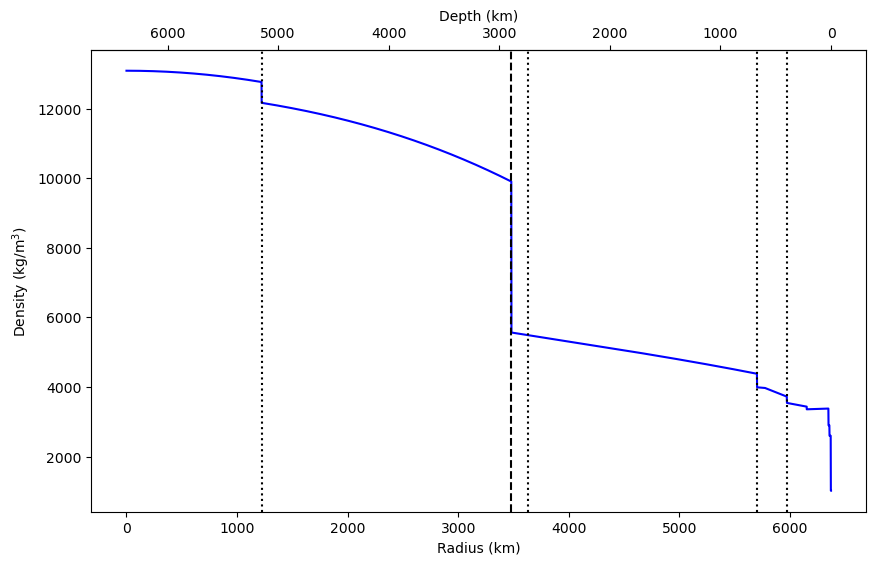

In [38]:
r_earth = 6371 # km

density_params = np.array([[13.0885,  0.0000, -8.8381,  0.0000],
                           [12.5815, -1.2638, -3.6426, -5.5281],
                           [7.9565, -6.4761,  5.5283, -3.0807],
                           [7.9565, -6.4761,  5.5283, -3.0807],
                           [7.9565, -6.4761,  5.5283, -3.0807],
                           [5.3197, -1.4836,  0.0000,  0.0000],
                           [11.2494, -8.0298,  0.0000,  0.0000],
                           [7.1089, -3.8045,  0.00002,  0.0000],
                           [2.6910,  0.6924,  0.0000,  0.0000],
                           [2.6910,  0.6924,  0.0000,  0.0000],
                           [2.9000,  0.0000,  0.0000,  0.0000],
                           [2.6000,  0.0000,  0.0000,  0.0000],
                           [1.0200,  0.0000,  0.0000,  0.0000]])

density_params[:,0] = density_params[:,0] * 1000
density_params[:,1] = (density_params[:,1] * 1000) / r_earth 
density_params[:,2] = (density_params[:,2] * 1000) / (r_earth**2)
density_params[:,3] = (density_params[:,3] * 1000) / (r_earth**3)


breakpoints = np.array([0.0, 1221.5, 3480.0, 3630.0, 5600.0, 5701.0, 5771.0,
                        5971.0, 6151.0, 6291.0, 6346.6, 6356.0, 6368.0, 6371.0])



prem = earth_model.Prem(breakpoints=breakpoints, density_params=density_params, 
                        r_earth=r_earth)
fig, ax = plt.subplots(figsize=(10,6))

rs = np.arange(0, 6371, 0.5)
ax.plot(rs, prem.density(rs), 'b')

ax.set_xlabel('Radius (km)')
ax.set_ylabel('Density (kg/m$^3$)')

ax.axvline(1221.5, ls=':', c='k')
ax.axvline(3480, ls='--', c='k')
ax.axvline(3630, ls=':', c='k')
ax.axvline(5701, ls=':', c='k')
ax.axvline(5971, ls=':', c='k')

secax = ax.secondary_xaxis('top', functions=(lambda x: 6371 - x, lambda x: 6371 - x))
secax.set_xlabel('Depth (km)')


plt.show()